##  <center>Module 8 Notebook
#### <center>Moving Beyond Linearity

Polynomial regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [16]:
wage = pd.read_csv('wage_data.csv')
wage

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


Using Seaborn, create a scatterplot of wage as a function of age

<AxesSubplot:xlabel='age', ylabel='wage'>

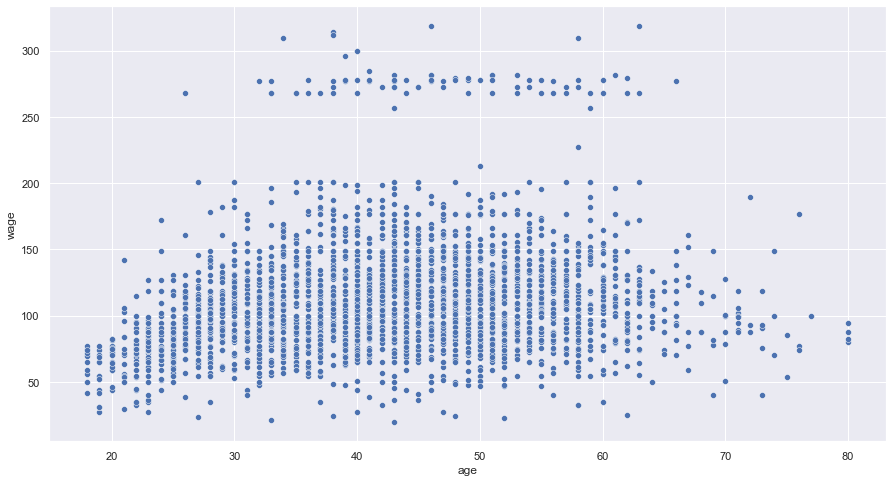

In [218]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = wage, x = 'age', y = 'wage')

#### Define sklearn polynomial regregession model using Sklearn pipeline function

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Pipeline chains together multiple steps
poly_model = Pipeline([('poly', PolynomialFeatures(degree=4)), ('linear', LinearRegression(fit_intercept = True))])
poly_model.fit(wage[['age']],wage['wage'])

Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())])

#### Create array of ages and use model to predict wages to create curve and plot

<AxesSubplot:xlabel='age', ylabel='wage'>

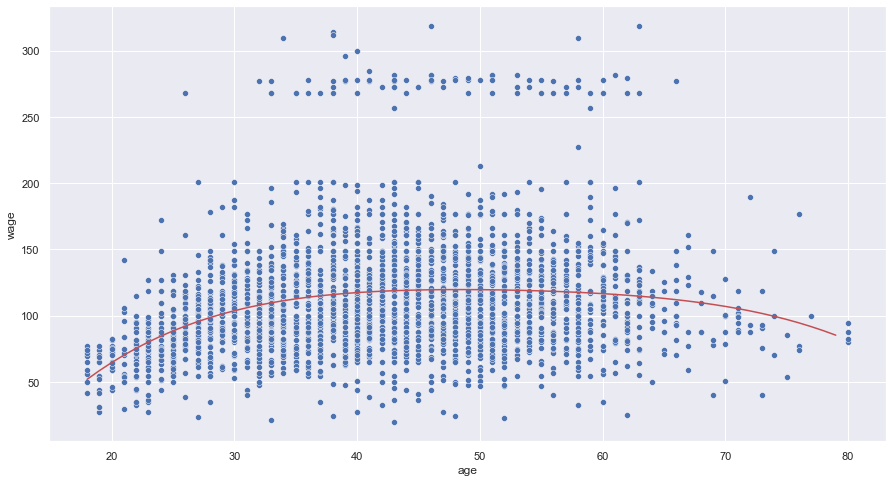

In [155]:
ages = np.arange(wage['age'].min(), wage['age'].max(), 1)
y_hat = poly_model.predict(ages.reshape(-1,1))
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = wage, x = 'age', y = 'wage')
sns.lineplot(x=ages, y=y_hat, color = 'r')

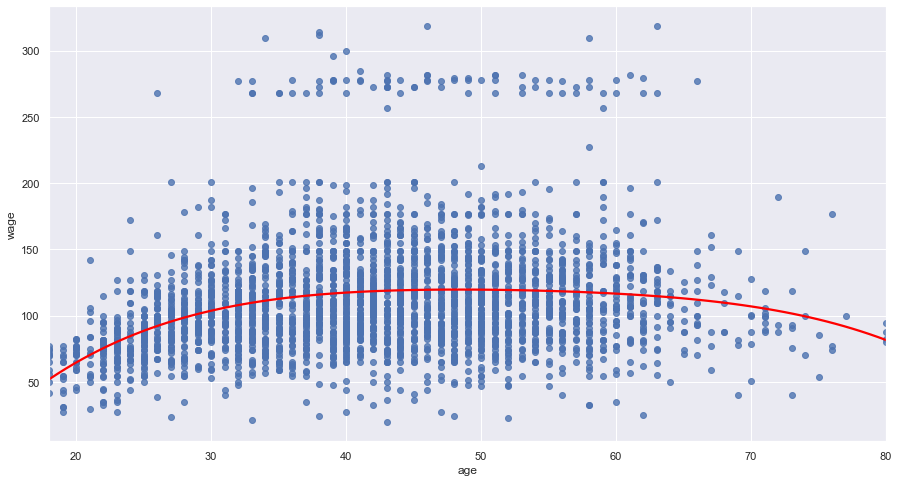

In [156]:
sns.regplot(x=wage['age'], y=wage['wage'], ci=None, order=4, line_kws={"color": "red"});

#### Step Function

In [27]:
df_cut, bins = pd.cut(wage['age'], 4, retbins=True, right=True)
bins

array([17.938, 33.5  , 49.   , 64.5  , 80.   ])

In [28]:
df_cut

0       (17.938, 33.5]
1       (17.938, 33.5]
2         (33.5, 49.0]
3         (33.5, 49.0]
4         (49.0, 64.5]
             ...      
2995      (33.5, 49.0]
2996    (17.938, 33.5]
2997    (17.938, 33.5]
2998    (17.938, 33.5]
2999      (49.0, 64.5]
Name: age, Length: 3000, dtype: category
Categories (4, interval[float64]): [(17.938, 33.5] < (33.5, 49.0] < (49.0, 64.5] < (64.5, 80.0]]

In [39]:
df_steps = pd.concat([wage['age'], df_cut, wage['age']], keys=['age','age_cuts','wage'], axis=1)
df_steps

,age,age_cuts,wage
0,18,"(17.938, 33.5]",18
1,24,"(17.938, 33.5]",24
2,45,"(33.5, 49.0]",45
3,43,"(33.5, 49.0]",43
4,50,"(49.0, 64.5]",50
...,...,...,...
2995,44,"(33.5, 49.0]",44
2996,30,"(17.938, 33.5]",30
2997,27,"(17.938, 33.5]",27
2998,27,"(17.938, 33.5]",27


In [54]:
# Create dummy variables for the age groups
X = pd.get_dummies(df_steps, drop_first = True).drop(['wage', 'age'],1)
X

,"age_cuts_(33.5, 49.0]","age_cuts_(49.0, 64.5]","age_cuts_(64.5, 80.0]"
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
2995,1,0,0
2996,0,0,0
2997,0,0,0
2998,0,0,0


In [59]:
bin_mapping = np.digitize(ages, bins)
bin_mapping

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [65]:
ages_steps = pd.get_dummies(bin_mapping).drop(1, axis=1)
ages_steps

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
57,0,0,1
58,0,0,1
59,0,0,1
60,0,0,1


<AxesSubplot:xlabel='age', ylabel='wage'>

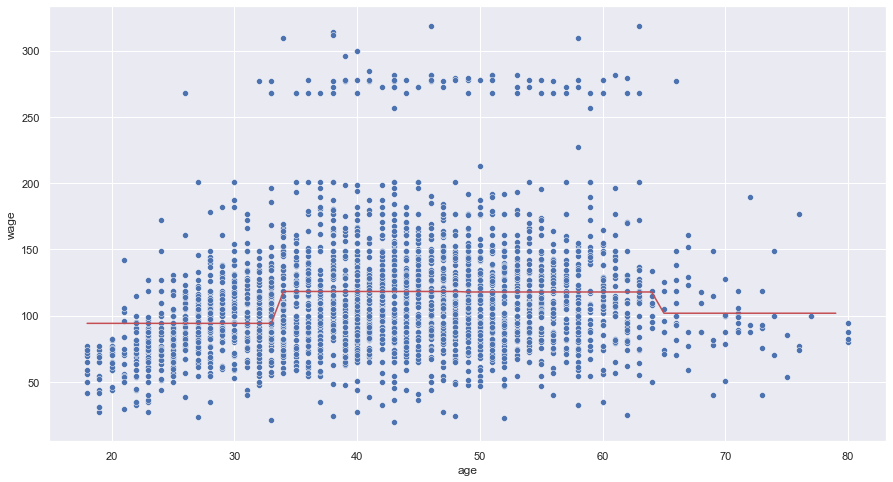

In [154]:
lregmodel = LinearRegression(fit_intercept = True)
lregmodel.fit(X,y = wage['wage'])
y_hat = lregmodel.predict(ages_steps)
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = wage, x = 'age', y = 'wage')
sns.lineplot(x=ages, y=y_hat, color = 'r')

#### Splines

Draw truncated power grid examples

In [174]:
min, max = 0,1
knot_1 = 0.5
beta_0, beta_1, beta_2 = 2, 1, 0
sample_data_2k_lower = pd.DataFrame(columns = ['x', 'y'])
sample_data_2k_lower['x'] = np.random.uniform(min, knot_1, int(knot_1*100))
sample_data_2k_lower['y'] = beta_0 + beta_1*sample_data_2k_lower['x'] + \
                                    np.random.normal(loc=0.0, scale=0.05, size=int(knot_1*100))
sample_data_2k_upper = pd.DataFrame(columns = ['x', 'y'])
sample_data_2k_upper['x'] = np.random.uniform(knot_1, max, int((1-knot_1)*100))
sample_data_2k_upper['y'] = beta_0 + beta_2*sample_data_2k_upper['x'] + \
                                    np.random.normal(loc=0.0, scale=0.05, size=int((1-knot_1)*100)) + knot_1

[(2.0, 3.0)]

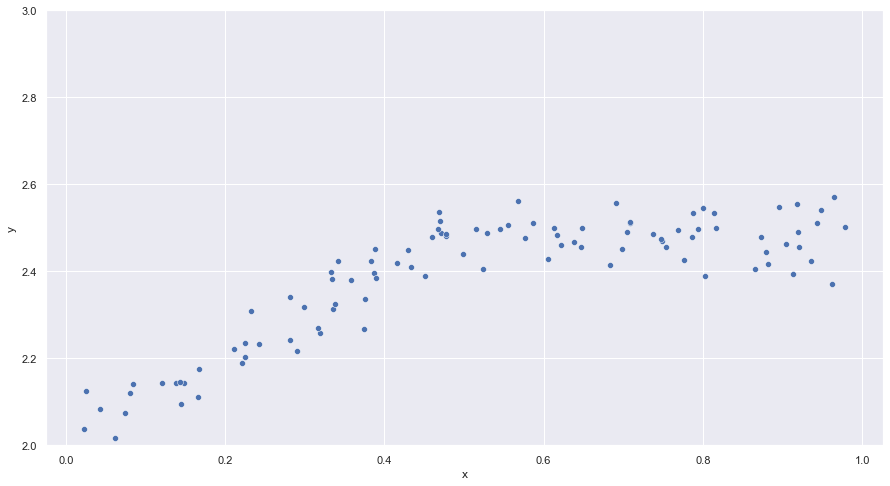

In [179]:
sample_data_2k = sample_data_2k_lower.append(sample_data_2k_upper,0)
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x = sample_data_2k['x'], y = sample_data_2k['y']).set(ylim=(2,3))

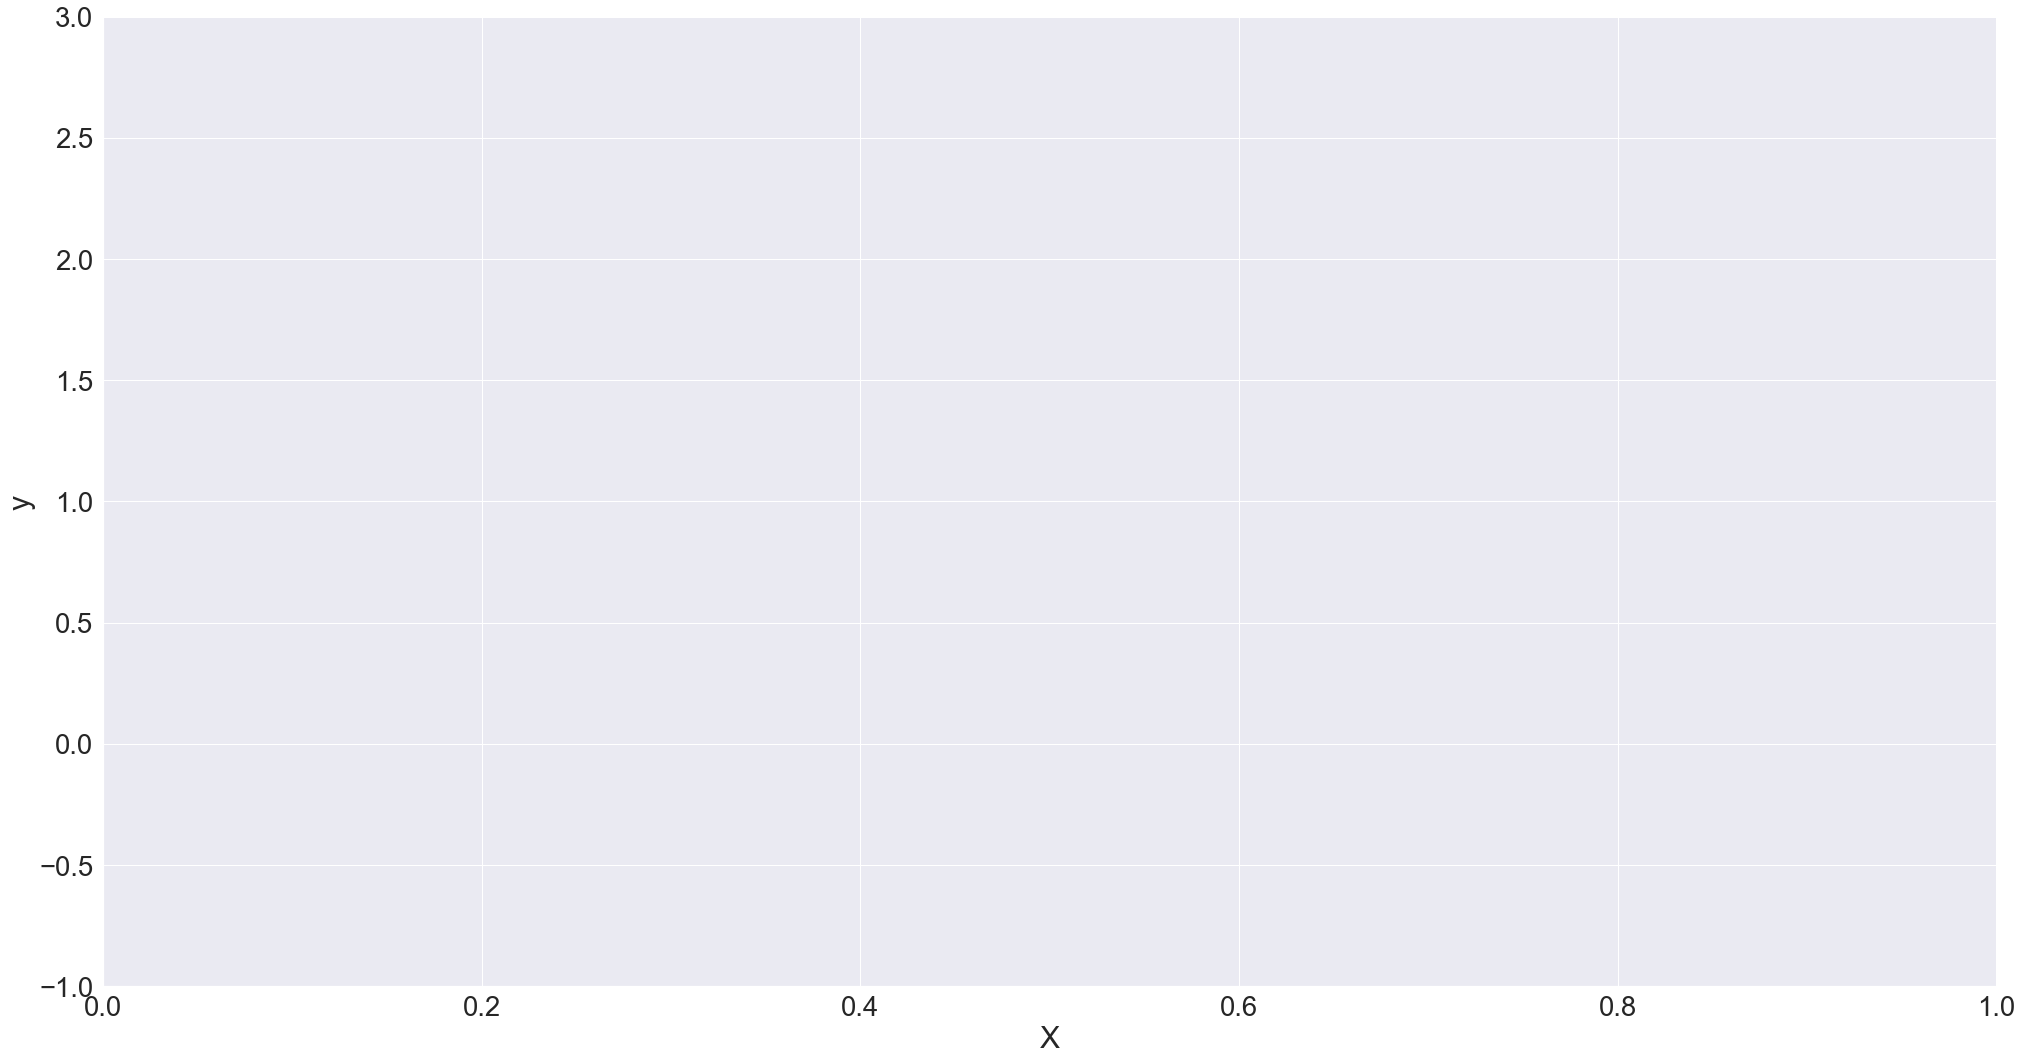

In [201]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 2.5)
sns.FacetGrid(data = sample_data_2k, height = 15, aspect = 15/8 ).set(ylim=(-1,3), xlabel = 'X', ylabel = 'y')

In [217]:
from statsmodels.gam.api import GLMGam, BSplines
bs = BSplines(wage[['age']], df=7, degree=3)
reg = GLMGam.from_formula('wage ~ age', wage, smoother=bs).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                         GLMGam   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                         6.00
Link Function:               identity   Scale:                          1592.5
Method:                         PIRLS   Log-Likelihood:                -15313.
Date:                Sun, 31 Jul 2022   Deviance:                   4.7662e+06
Time:                        15:10:45   Pearson chi2:                 4.77e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.1720      9.878      3.662      0.000      16.812      55.532
age            1.1190      0.161      6.945      0.000       0.803       1.435
age_s0        21.9493     11.786      1.862      0.063      -1.150      45.049
age_s1        39.2359      5.849      6.708      0.000      27.772      50.700
age_s2        38.6929      5.676      6.817      0.000      27.569      49.817
age_s3        11.4261      6.444      1.773      0.076      -1.204      24.056
age_s4        13.5710     12.406      1.094      0.274     -10.745      37.887
age_s5       -54.6265     10.772     -5.071      0.000     -75.739     -33.514
==============================================================================
"""

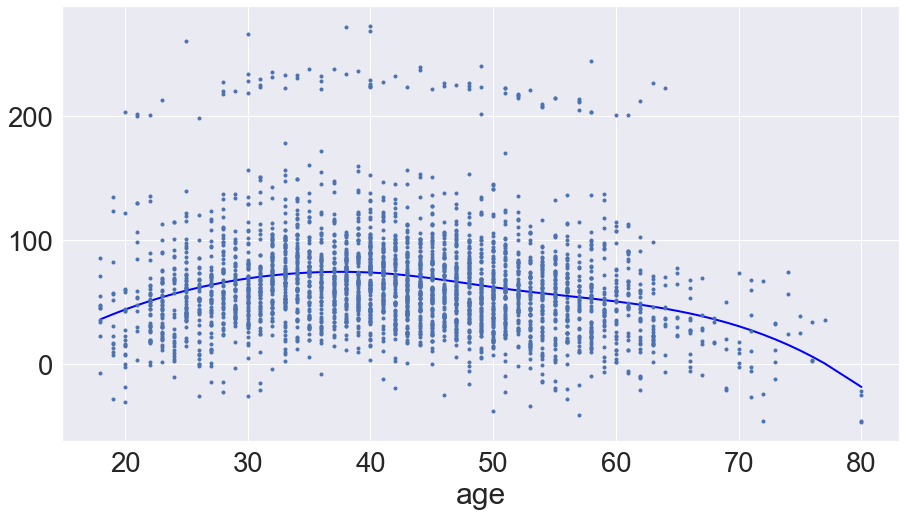

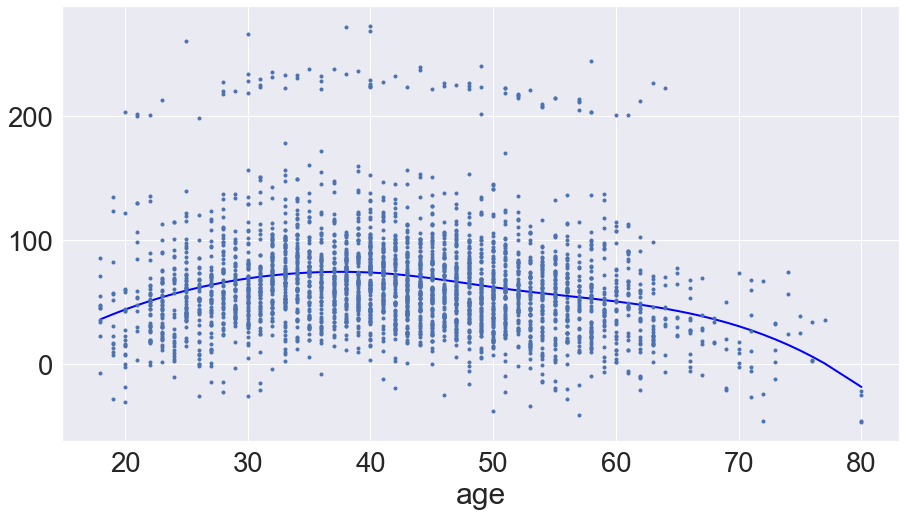

In [215]:
reg.plot_partial(0, cpr=True, plot_se=False)